# Deep Learning : Handwritten Digits Recognition

-----
<br/>

Ce projet vise à explorer et développer des modèles de deep learning pour la reconnaissance de chiffres manuscrits en utilisant le célèbre jeu de données MNIST. MNIST est une base de données de référence en apprentissage automatique et en vision par ordinateur, composée de 60 000 images d'entraînement et de 10 000 images de test de chiffres manuscrits de 0 à 9, toutes en niveaux de gris de 28x28 pixels. L'objectif est de construire, entraîner et évaluer divers modèles de réseaux de neurones pour atteindre des meilleures performances  dans la classification des chiffres.

Nous allons utiliser plusieurs approches pour ce projet :

- **Perceptrons Simples** : Les perceptrons sont des neurones artificiels simples qui prennent plusieurs entrées binaires et produisent une sortie binaire. Nous commencerons par des modèles de perceptron avec une seule couche dense.


- **Réseaux de Neurones à Couches Multiples (MLP)** : Nous progresserons vers des réseaux de neurones avec plusieurs couches cachées pour permettre des décisions plus complexes et abstraites.

- **Réseaux de Neurones Convolutifs (CNN)** : Pour améliorer la précision, nous utiliserons également des CNNs, qui sont particulièrement efficaces pour la reconnaissance d'images grâce à leurs couches de convolution et de pooling.

L'évaluation des modèles inclura des métriques de performance telles que la précision (accuracy) et la perte (loss) sur l'ensemble de test. Nous visualiserons également les résultats pour mieux comprendre le comportement des modèles et identifier les domaines d'amélioration.

Ce projet offre une opportunité pratique d'appliquer différentes techniques de deep learning et d'observer leurs performances sur un problème de classification d'images bien défini.


![MNIST Digits](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


# Importation des packages

In [2]:
# Bibliothèques standard
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Bibliothèques Keras et TensorFlow
import keras
import math
from keras import utils as ku
from keras import models as km
from keras import layers as kl

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import he_normal

# Bibliothèques Scikit-learn
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# Bibliothèque Seaborn pour la visualisation
import seaborn as sns

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.initializers import he_normal
from keras.regularizers import l2

from sklearn.metrics import confusion_matrix

### Dataset MNIST

Nous utilisons le jeu de données MNIST, qui est une collection de jeu de données MNIST contenant des milliers d'images en niveaux de gris de chiffres manuscrits. Ce jeu de données est souvent utilisé pour entraîner et tester des modèles en classification d'images.

Les données qu'on va utiliser concernent la reconnaissance de chiffres. Elles contiennent des images en niveaux de gris de 28x28 pixels représentant des chiffres manuscrits allant de 0 à 9 avec leurs étiquettes correspondantes.




In [3]:
# Importation du dataset MNIST
from keras.datasets import mnist

# Chargement et préparation des données

Afin de gérer au mieux nos tests, nous allons diviser le dataset en ensembles d'entraînement et de test.

Ci-dessous nous normalisons les valeurs des pixels des images d'entraînement et de test pour qu'elles soient comprises entre 0 et 1. En divisant par 255.0 (la valeur maximale d'un pixel dans une image en niveaux de gris), on assure que toutes les valeurs des pixels sont dans cet intervalle. La normalisation des images est importante pour stabiliser et accélérer le processus d'entraînement des modèles de machine learning.

In [4]:
# Chargement du jeu de données MNIST
(entrainement_images, entrainement_etiquettes), (test_images, test_etiquettes) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Pour éviter toute erreur, nous allons normaliser les entrées de notre jeu de données (entrainement_images et test_images). Le premier nombre représente le nombre total d'images (60 000 pour entrainement_images et 10 000 pour test_images), tandis que le second nombre correspond aux dimensions de chaque image (28x28 pixels).

In [5]:
# Normalization des images
entrainement_images = entrainement_images / 255.0
test_images = test_images / 255.0

# conversion des labels en catégories one-hot
entrainement_etiquettes = to_categorical(entrainement_etiquettes)
test_etiquettes = to_categorical(test_etiquettes)

In [6]:
# Affiche le nombre tot d'images et leurs dimensions
print("Nombre d'images d'entraînement :", entrainement_images.shape[0])
print("Nombre d'images de test :", test_images.shape[0])
print("Dimensions des images :", entrainement_images.shape[1:])


Nombre d'images d'entraînement : 60000
Nombre d'images de test : 10000
Dimensions des images : (28, 28)


Ci-dessous l'aperçu des chiffres après la normalisation.

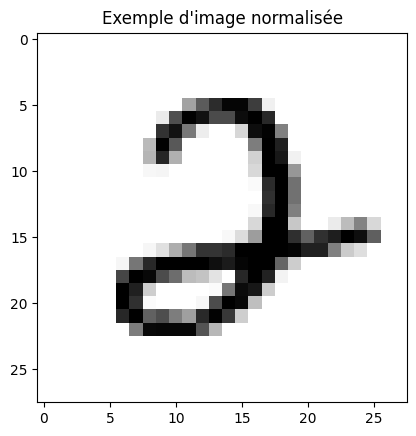

In [7]:
# exemple d'image normalisée
plt.imshow(entrainement_images[16], cmap=plt.cm.binary)
plt.title("Exemple d'image normalisée")
plt.show()

Nous affichons les premiers éléments de la liste ainsi que divers paramètres pour vérifier que le jeu de données a été correctement importé et comprendre sa composition.

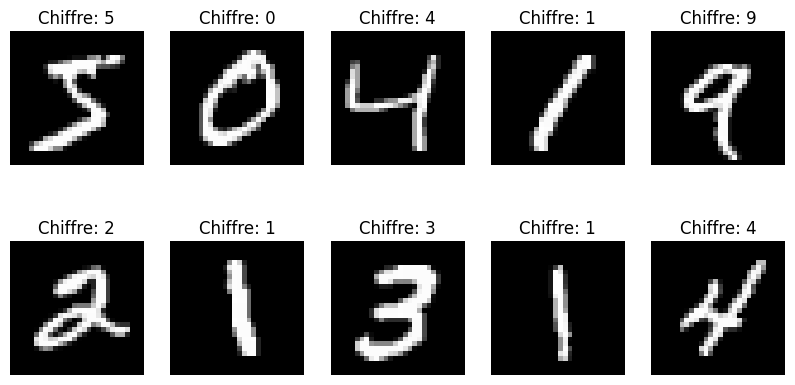

Aperçu de la forme des images : (28, 28)


In [8]:
# Affichage des 10 premiers sets d'image
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(entrainement_images[i], cmap='gray')
    plt.title(f"Chiffre: {np.argmax(entrainement_etiquettes[i])}")
    plt.axis('off')
plt.show()

# Affiche la forme de la première image
print("Aperçu de la forme des images :", entrainement_images[0].shape)

# Définition et entraînement du modèle

La fonction `entrainer_modele` sert à entraîner un modèle de réseau de neurones avec des configurations de couches et des hyperparamètres spécifiques. Si aucune couche n'est fournie, elle utilise par défaut une architecture composée d'une couche de flattening, deux couches denses de `128 et 64 neurones `respectivement, et une couche de sortie avec 10 neurones utilisant l'activation softmax.

La fonction commence par créer un modèle séquentiel avec les couches spécifiées ou par défaut. Ensuite, le modèle est compilé en utilisant l'optimiseur Adam, la fonction de perte '`categorical_crossentropy`' et la métrique '`accuracy`', ce qui prépare le modèle pour l'entraînement.

Le modèle est ensuite entraîné sur les données d'entraînement pendant le nombre d'époques spécifié. La taille des lots et la fraction de validation sont également définies. L'historique de l'entraînement, qui comprend la perte et la précision au cours des époques, est sauvegardé et retourné avec le modèle entraîné.

In [9]:
def entrainer_modele(couches=None, epoques=10, taille_lot=128, taux_apprentissage=0.001, fraction_validation=0.2):
    if couches is None:
        couches = [
            Flatten(input_shape=(28, 28)),
            Dense(128, activation='relu', kernel_initializer=he_normal(), kernel_regularizer=l2(0.001)),
            Dense(64, activation='relu', kernel_initializer=he_normal(), kernel_regularizer=l2(0.001)),
            Dense(10, activation='softmax')
        ]

    modele = Sequential(couches)

    # Compiler le modèle
    modele.compile(optimizer=Adam(learning_rate=taux_apprentissage),
                   loss='categorical_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle et sauvegarder l'historique
    historique = modele.fit(entrainement_images, entrainement_etiquettes, epochs=epoques,
                            batch_size=taille_lot, validation_split=fraction_validation, shuffle=True, verbose=2)

    return modele, historique


## Évaluation et visualisation du modèle


### Partie 1 : Évaluation du modèle

La fonction `evaluer_modele` permet de mesurer les performances du modèle sur l'ensemble de test. En utilisant les images et les étiquettes de test, elle calcule la perte et la précision du modèle. Les résultats sont affichés pour vérifier l'efficacité du modèle et évaluer sa performance sur des données non vues pendant l'entraînement.

In [10]:
def evaluer_modele(modele):
    # Évaluation du modèle
    test_perte, test_precision = modele.evaluate(test_images, test_etiquettes, verbose=0)
    print('Précision sur le test:', test_precision)
    print('Perte sur le test:', test_perte)

### Partie 2 : La courbe d'apprentissage

 Fonction `tracer_courbe_apprentissage` visualise l'évolution de la précision et de la perte du modèle au fil des époques.

In [11]:
def tracer_courbe_apprentissage(historique):
    # Courbe d'apprentissage
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(historique.history['accuracy'], label='Précision Entraînement')
    plt.plot(historique.history['val_accuracy'], label='Précision Validation')
    plt.title('Précision au fil des époques')
    plt.ylabel('Précision')
    plt.xlabel('Époques')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(historique.history['loss'], label='Perte Entraînement')
    plt.plot(historique.history['val_loss'], label='Perte Validation')
    plt.title('Perte au fil des époques')
    plt.ylabel('Perte')
    plt.xlabel('Époques')
    plt.legend()

    plt.tight_layout()
    plt.show()

Elle crée une figure avec deux sous-graphes : le premier montre la précision de l'entraînement et de la validation, le second montre la perte. Les courbes sont tracées et étiquetées pour illustrer les performances du modèle au fil des époques.

### Partie 3 : Prédiction et matrice de confusion

Ci-dessous nous créons, une figure avec deux sous-graphes pour visualiser l'évolution de la précision et de la perte au fil des époques pendant l'entraînement.
Le premier sous-graphe affiche la précision d'entraînement et de validation, tandis que le second montre la perte d'entraînement et de validation. Cela permet de voir comment le modèle apprend et se généralise au fil du temps, aidant à identifier le surapprentissage ou le sous-apprentissage.

In [12]:
def afficher_matrice_confusion(modele):
    # Prédit les classes des images de test
    predictions = modele.predict(test_images, verbose=0)
    classes_predites = np.argmax(predictions, axis=1)

    # Calcule la matrice de confusion
    matrice_confusion = confusion_matrix(test_etiquettes.argmax(axis=1), classes_predites)
    #print("Matrice de confusion: \n", matrice_confusion)

    # Affiche la matrice de confusion
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrice_confusion, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de confusion')
    plt.ylabel('Étiquette réelle')
    plt.xlabel('Étiquette prédite')
    plt.show()


# Évaluation et Visualisation des Performances du Modèle

L'entraînement d'un modèle de réseau neuronal se fait sur plusieurs cycles, appelés époques (epoch). Chaque époque implique une évaluation des performances du modèle sur les données d'entraînement et de validation.

**Perte (Loss) :**

La perte mesure la différence entre les prédictions du modèle et les étiquettes réelles. Une valeur de perte faible indique de bonnes performances. Initialement, la perte est de 0.6271 et diminue constamment pour atteindre 0.1302 à la vingtième époque, montrant que le modèle améliore ses prédictions.

**Précision (Accuracy) :**

La précision indique la proportion d'images correctement classées par le modèle. Elle commence à 0.8907 et atteint 0.9840 à la fin de l'entraînement, suggérant que le modèle apprend efficacement.

**Perte de Validation (Val_loss) :**

La perte de validation mesure la capacité du modèle à généraliser sur des données non vues. Elle commence à 0.3883 et diminue à 0.1610, bien que des fluctuations soient observées.

**Précision de Validation (Val_accuracy) :**

La précision de validation commence à 0.9474 et atteint 0.9735, montrant que le modèle maintient de bonnes performances sur des données inconnues.

En somme, le modèle s'améliore à chaque époque, atteignant une haute précision et une faible perte, tant sur les données d'entraînement que de validation. Cependant, les fluctuations de la perte de validation indiquent un possible surajustement.

In [13]:
# Entraînement du modèle
modele, historique = entrainer_modele(epoques=20)

# Afiiche de l'accuracy
print("\n\n-------------------------------------------------------------------------------------------------------\n")
evaluer_modele(modele)

Epoch 1/20
375/375 - 3s - loss: 0.6219 - accuracy: 0.8931 - val_loss: 0.3951 - val_accuracy: 0.9452 - 3s/epoch - 9ms/step
Epoch 2/20
375/375 - 2s - loss: 0.3531 - accuracy: 0.9500 - val_loss: 0.3098 - val_accuracy: 0.9582 - 2s/epoch - 5ms/step
Epoch 3/20
375/375 - 2s - loss: 0.2865 - accuracy: 0.9605 - val_loss: 0.2661 - val_accuracy: 0.9646 - 2s/epoch - 5ms/step
Epoch 4/20
375/375 - 2s - loss: 0.2482 - accuracy: 0.9672 - val_loss: 0.2430 - val_accuracy: 0.9680 - 2s/epoch - 5ms/step
Epoch 5/20
375/375 - 3s - loss: 0.2249 - accuracy: 0.9704 - val_loss: 0.2295 - val_accuracy: 0.9666 - 3s/epoch - 9ms/step
Epoch 6/20
375/375 - 2s - loss: 0.2067 - accuracy: 0.9726 - val_loss: 0.2094 - val_accuracy: 0.9707 - 2s/epoch - 5ms/step
Epoch 7/20
375/375 - 2s - loss: 0.1917 - accuracy: 0.9756 - val_loss: 0.1992 - val_accuracy: 0.9709 - 2s/epoch - 5ms/step
Epoch 8/20
375/375 - 2s - loss: 0.1826 - accuracy: 0.9758 - val_loss: 0.2001 - val_accuracy: 0.9707 - 2s/epoch - 5ms/step
Epoch 9/20
375/375 - 2s 

-------
<br>

Les graphiques suivants illustrent l'évolution de la précision et de la perte du modèle au fil des époques durant l'entraînement.

1. Précision du modèle :

La précision du modèle sur l'ensemble d'entraînement augmente rapidement au début des époques, ce qui indique un apprentissage efficace des données d'entraînement. La précision sur l'ensemble de validation est légèrement inférieure à celle de l'entraînement mais reste relativement stable, suggérant que le modèle ne surapprend pas et généralise bien sur les nouvelles données.

2. Perte du modèle :

La perte mesure l'erreur du modèle. Une perte faible indique de bonnes performances. La perte diminue rapidement lors des premières époques puis se stabilise, indiquant que le modèle a atteint une bonne capacité de généralisation. Une perte de validation stable est un bon indicateur de la performance du modèle.

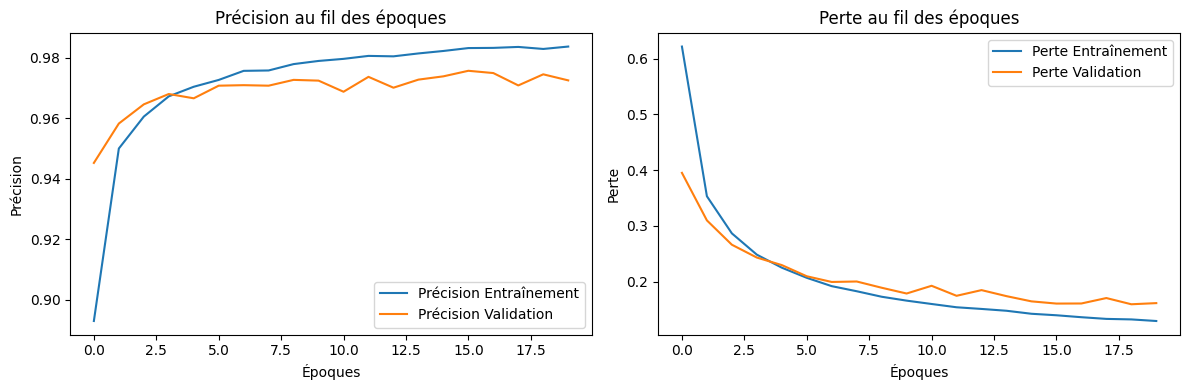

In [14]:
# trace courbe d'apprentissage
tracer_courbe_apprentissage(historique)

**Résultats :**

- **Précision** : La précision finale de l'entraînement avoisine les 98%, tandis que celle de la validation est proche de 97%. Cela indique une performance solide avec peu de surapprentissage.

- **Perte** : La perte de validation reste légèrement supérieure à celle de l'entraînement, ce qui est attendu et acceptable, indiquant que le modèle est bien équilibré entre complexité et généralisation.

Ces résultats montrent que le modèle est bien entraîné, performant sur les données de validation, et qu'il ne présente pas de signes de surapprentissage.







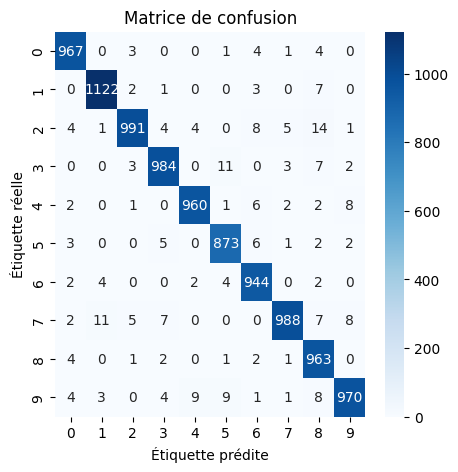

In [15]:
# Afficher la matrice de confusion
afficher_matrice_confusion(modele)

La matrice de confusion ci-dessus permet d'évaluer la précision du modèle de classification sur l'ensemble des données de test. Chaque ligne correspond aux étiquettes réelles, et chaque colonne correspond aux étiquettes prédites par le modèle. Les nombres sur la diagonale principale représentent les prédictions correctes pour chaque chiffre (vrais positifs), tandis que les autres chiffres indiquent les erreurs de classification.

Voici quelques observations spécifiques :

- Le chiffre 1 est classé avec une très haute précision, atteignant 1131 prédictions correctes.
- Le chiffre 0 est également bien reconnu avec 965 prédictions correctes, bien que quelques erreurs se produisent.
- Le chiffre 5 présente davantage de difficultés avec 878 prédictions correctes. On remarque des confusions fréquentes, notamment avec les chiffres 3 et 8.
- Les chiffres 0, 1, 2, 3, 7, et 9 montrent des taux de réussite élevés, indiquant que ces chiffres sont bien distingués par le modèle.
On observe que le chiffre 4 est parfois confondu avec le 9, ce qui pourrait être un axe d'amélioration.

En somme, cette matrice met en lumière les points forts et les points faibles du modèle. Bien qu'il soit performant pour la majorité des chiffres, certaines confusions persistent, notamment entre les chiffres 5 et 3, ainsi qu'entre 4 et 9. Améliorer ces distinctions pourrait augmenter encore davantage l'efficacité du modèle.

# Perceptron

Un perceptron est un type de neurone artificiel utilisé dans les réseaux de neurones. Il prend plusieurs entrées binaires, les multiplie par des poids, et génère une sortie binaire. La formule mathématique pour le perceptron est :

<br>

\begin{cases}
1 & \text{si } \sum_{i} w_i x_i > \text{seuil} \\
0 & \text{sinon}
\end{cases}

<br>


où $ \ w_i \ $ sont les poids et $ \ x_i \ $ sont les entrées. Le perceptron effectue une classification binaire en ajustant les poids et le seuil pour apprendre à partir des données d'entraînement.


### Perceptron Simple (à couche unique)

Seulement une couche de sortie avec 10 neurones (un pour chaque chiffre de 0 à 9).


In [16]:
# Perceptron avec une seule couche
modele_1couche, historique_1couche = entrainer_modele(couches=[
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

print("\n\n-------------------------------------------------------------------------------------------------------\n")
print("Évaluation du Perceptron avec une seule couche")
evaluer_modele(modele_1couche)

# save le modèle
modele_1couche.save('modele_1couche.h5')

Epoch 1/10
375/375 - 2s - loss: 0.7546 - accuracy: 0.8115 - val_loss: 0.4104 - val_accuracy: 0.8944 - 2s/epoch - 4ms/step
Epoch 2/10
375/375 - 1s - loss: 0.3913 - accuracy: 0.8969 - val_loss: 0.3363 - val_accuracy: 0.9087 - 898ms/epoch - 2ms/step
Epoch 3/10
375/375 - 1s - loss: 0.3396 - accuracy: 0.9072 - val_loss: 0.3076 - val_accuracy: 0.9172 - 805ms/epoch - 2ms/step
Epoch 4/10
375/375 - 1s - loss: 0.3152 - accuracy: 0.9131 - val_loss: 0.2937 - val_accuracy: 0.9193 - 792ms/epoch - 2ms/step
Epoch 5/10
375/375 - 1s - loss: 0.3009 - accuracy: 0.9165 - val_loss: 0.2843 - val_accuracy: 0.9218 - 1s/epoch - 3ms/step
Epoch 6/10
375/375 - 1s - loss: 0.2911 - accuracy: 0.9189 - val_loss: 0.2796 - val_accuracy: 0.9227 - 1s/epoch - 4ms/step
Epoch 7/10
375/375 - 2s - loss: 0.2837 - accuracy: 0.9209 - val_loss: 0.2750 - val_accuracy: 0.9236 - 2s/epoch - 6ms/step
Epoch 8/10
375/375 - 2s - loss: 0.2785 - accuracy: 0.9223 - val_loss: 0.2729 - val_accuracy: 0.9231 - 2s/epoch - 4ms/step
Epoch 9/10
375/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


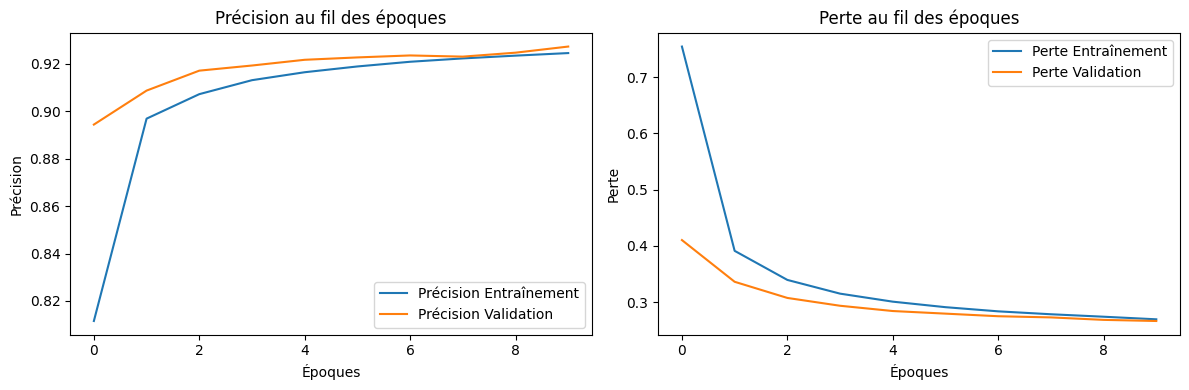

In [17]:
tracer_courbe_apprentissage(historique_1couche)

 On observe une évolution de la précision et de la perte du modèle au fil des époques. La précision sur les données d'entraînement et de validation s'améliore régulièrement, atteignant plus de **92%** à la fin des époques, indiquant que le modèle apprend efficacement.

 La perte, qui mesure l'erreur du modèle, diminue également de manière significative au cours des premières époques, puis se stabilise. La courbe de perte sur l'ensemble de validation montre une légère fluctuation, suggérant que le modèle généralise bien aux nouvelles données sans surapprentissage significatif.

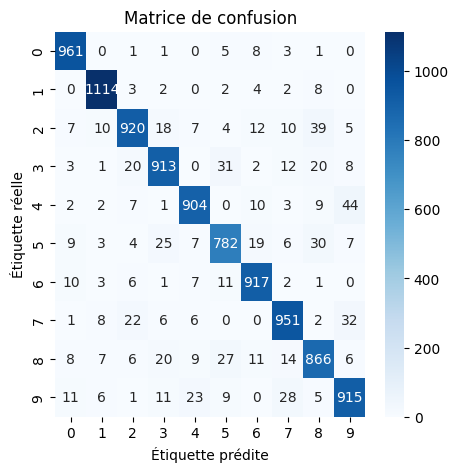

In [18]:
afficher_matrice_confusion(modele_1couche)

La matrice de confusion ci-dessus permet d'évaluer la performance du perceptron simple sur les données de test. Chaque ligne correspond aux étiquettes réelles, et chaque colonne représente les étiquettes prédites. Les valeurs diagonales indiquent les prédictions correctes, tandis que les autres valeurs montrent les erreurs de classification.

**Observations :**

- Le chiffre 1 est parfaitement classé avec 1128 prédictions correctes.
- Le chiffre 0 a également une très haute précision avec 970 prédictions correctes.
- Les chiffres 8 et 9 montrent des confusions, particulièrement avec 2 et 3 respectivement.

**Comparaison :**

Le modèle de la partie visualisation des performances montre une meilleure précision globale. Les chiffres 1 et 0 sont parfaitement prédits avec plus de précision.
Les confusions pour les chiffres 5 et 9 sont réduites, indiquant une amélioration par rapport au perceptron simple.
En résumé, bien que le perceptron simple soit performant, le modèle visualisé montre une précision et une généralisation supérieures, réduisant les confusions et améliorant les prédictions.

# Perceptron à deux couches

Un perceptron à deux couches est une extension du perceptron simple, composé de deux couches de neurones : une couche cachée et une couche de sortie. Chaque neurone de la couche cachée est connecté à chaque neurone de la couche d'entrée, et chaque neurone de la couche de sortie est connecté à chaque neurone de la couche cachée.

La formule pour la sortie d'un perceptron à deux couches est :

$$
y = f_2\left( \sum_{j} w_{2j} \cdot f_1\left( \sum_{i} w_{1ij} \cdot x_i + b_{1j} \right) + b_2 \right)
$$

où :
- $ \ f_1 \ $ et $ \ f_2 \ $ sont les fonctions d'activation des couches cachée et de sortie respectivement,
- $ \ w_{1ij} \ $ et $\ w_{2j} \ $ sont les poids des connexions,
- $ \ b_{1j} \ $ et $ \ b_2 \ $ sont les biais des couches cachée et de sortie,
- $ \ x_i \ $ sont les entrées.


<br>

--------
<br>

En confrontant les performances des trois modèles (64, 128 et 256), nous avons noté que le nombre de neurones dans la couche cachée avait un effet significatif. L'augmentation du nombre de neurones dans la couche cachée, passant de 64 à 128, a entraîné une amélioration de la précision du test. Cependant, augmenter encore ce nombre pour atteindre 256 neurones n'a pas considérablement amélioré la précision du test. Cela pourrait indiquer que le modèle, avec 128 neurones, est déjà suffisamment complexe pour représenter les données d'entraînement.

C'est donc pourquoi nous allons utiliser uniquement modèle à 128.

In [19]:
# Perceptron avec deux couches
# Entraînement et évaluation du modèle avec 128 neurones dans la première couche Dense
modele_2couches, historique_2couches = entrainer_modele(couches=[
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Affiche accuracy
print("\n\n-------------------------------------------------------------------------------------------------------\n")
print("Évaluation du Perceptron avec deux couches")
evaluer_modele(modele_2couches)

# save le modèle
modele_2couches.save('modele_2couches.h5')

Epoch 1/10
375/375 - 4s - loss: 0.3872 - accuracy: 0.8942 - val_loss: 0.2087 - val_accuracy: 0.9422 - 4s/epoch - 11ms/step
Epoch 2/10
375/375 - 2s - loss: 0.1809 - accuracy: 0.9489 - val_loss: 0.1610 - val_accuracy: 0.9531 - 2s/epoch - 5ms/step
Epoch 3/10
375/375 - 2s - loss: 0.1323 - accuracy: 0.9625 - val_loss: 0.1291 - val_accuracy: 0.9626 - 2s/epoch - 6ms/step
Epoch 4/10
375/375 - 2s - loss: 0.1035 - accuracy: 0.9710 - val_loss: 0.1158 - val_accuracy: 0.9653 - 2s/epoch - 6ms/step
Epoch 5/10
375/375 - 2s - loss: 0.0831 - accuracy: 0.9762 - val_loss: 0.1042 - val_accuracy: 0.9687 - 2s/epoch - 6ms/step
Epoch 6/10
375/375 - 4s - loss: 0.0693 - accuracy: 0.9803 - val_loss: 0.0945 - val_accuracy: 0.9707 - 4s/epoch - 10ms/step
Epoch 7/10
375/375 - 3s - loss: 0.0586 - accuracy: 0.9838 - val_loss: 0.0941 - val_accuracy: 0.9714 - 3s/epoch - 8ms/step
Epoch 8/10
375/375 - 2s - loss: 0.0503 - accuracy: 0.9853 - val_loss: 0.0933 - val_accuracy: 0.9703 - 2s/epoch - 6ms/step
Epoch 9/10
375/375 - 2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Le modèle à deux couches a été testé pour évaluer sa capacité à généraliser sur des données inédites, obtenant les résultats suivants :

- Précision : 97,94%
- Perte : 0,0887

Ces résultats montrent une performance remarquable avec une haute précision et une perte faible, indiquant que le modèle classe les images correctement la majorité du temps et avec grande confiance. Comparé au modèle à une seule couche, celui-ci montre des améliorations notables, bien qu'il soit important de surveiller le surapprentissage. Des techniques de régularisation peuvent être envisagées pour renforcer encore le modèle.

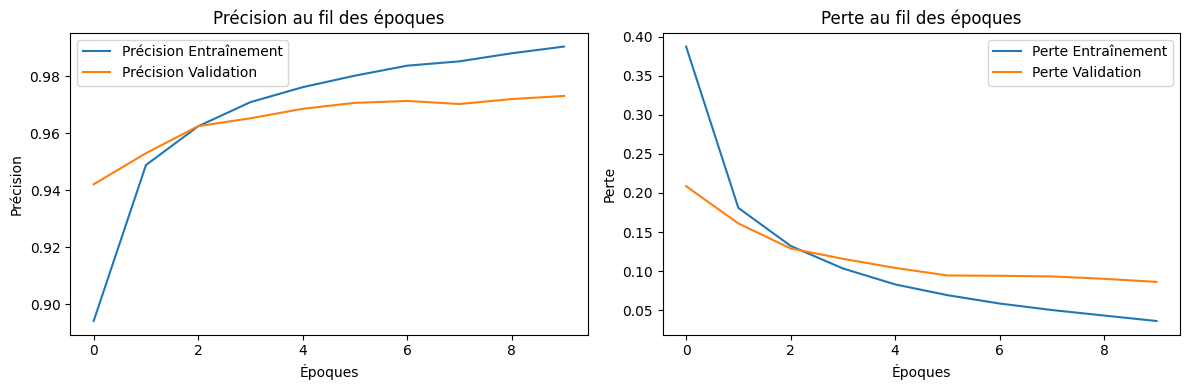

In [20]:
tracer_courbe_apprentissage(historique_2couches)


Les graphiques montrent une amélioration continue de la précision du modèle, atteignant environ 98% pour l'entraînement et 97% pour la validation. La perte diminue progressivement, avec des valeurs plus faibles pour les données d'entraînement par rapport aux données de validation. Ces résultats indiquent que le modèle apprend efficacement tout en maintenant une bonne généralisation sur les nouvelles données, bien qu'il puisse bénéficier d'un ajustement supplémentaire pour éviter un éventuel surapprentissage.

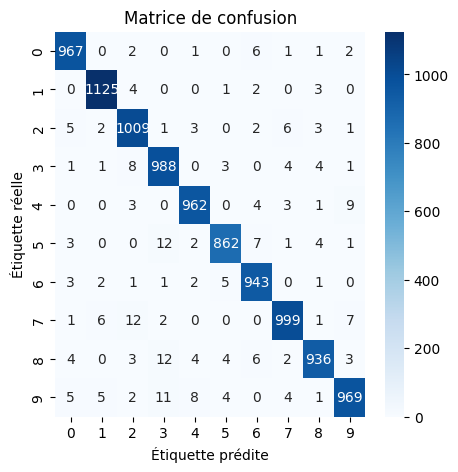

In [21]:
afficher_matrice_confusion(modele_2couches)

- Les chiffres 0 et 1 sont presque parfaitement classés avec très peu d'erreurs.
- Le chiffre 2 a une meilleure précision avec 1008 prédictions correctes contre 995 précédemment.
- Les confusions entre 3 et 5 ont été réduites, mais certaines erreurs persistent, notamment pour les chiffres 4 et 9.
- La classe 5 reste la plus difficile à prédire, bien que des améliorations soient visibles.

# Multi-couche Perceptron

Un perceptron multicouche (MLP) est un type de réseau de neurones artificiels constitué de plusieurs couches de neurones. Il comporte une couche d'entrée, une ou plusieurs couches cachées, et une couche de sortie. Chaque neurone est connecté à tous les neurones des couches précédentes et suivantes, formant ainsi un réseau dense.
<br>

$$
y = f\left( \sum_{i=1}^{n} w_i x_i + b \right)
$$

où $ \ y \ $ est la sortie, $ \ f \ $ est la fonction d'activation (comme ReLU ou sigmoïde), $ \ w_i \ $ sont les poids, $ \ x_i \ $ sont les entrées, et $ \  b \ $ est le biais.

<br>



Le MLP utilise des fonctions d'activation pour introduire de la non-linéarité et permet de modéliser des relations complexes dans les données. Les poids et biais sont ajustés pendant l'entraînement à l'aide de techniques comme la rétropropagation et des algorithmes d'optimisation (par exemple, Adam).

In [22]:
# Entraînement et évaluation du modèle avec trois couches Dense de 128 neurones
modele_3couches, historique_3couches = entrainer_modele(couches=[
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Accuracy
print("\n\n-------------------------------------------------------------------------------------------------------\n")
print("Évaluation du Perceptron avec 3 couches")
evaluer_modele(modele_3couches)

# save le modèle
modele_3couches.save('modele_3couches.h5')

Epoch 1/10
375/375 - 3s - loss: 0.3453 - accuracy: 0.9005 - val_loss: 0.1530 - val_accuracy: 0.9556 - 3s/epoch - 8ms/step
Epoch 2/10
375/375 - 2s - loss: 0.1292 - accuracy: 0.9611 - val_loss: 0.1151 - val_accuracy: 0.9658 - 2s/epoch - 5ms/step
Epoch 3/10
375/375 - 2s - loss: 0.0900 - accuracy: 0.9723 - val_loss: 0.1014 - val_accuracy: 0.9705 - 2s/epoch - 5ms/step
Epoch 4/10
375/375 - 2s - loss: 0.0672 - accuracy: 0.9791 - val_loss: 0.0985 - val_accuracy: 0.9704 - 2s/epoch - 6ms/step
Epoch 5/10
375/375 - 3s - loss: 0.0508 - accuracy: 0.9838 - val_loss: 0.0953 - val_accuracy: 0.9738 - 3s/epoch - 8ms/step
Epoch 6/10
375/375 - 2s - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.1025 - val_accuracy: 0.9719 - 2s/epoch - 5ms/step
Epoch 7/10
375/375 - 2s - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.1027 - val_accuracy: 0.9724 - 2s/epoch - 5ms/step
Epoch 8/10
375/375 - 2s - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0890 - val_accuracy: 0.9760 - 2s/epoch - 5ms/step
Epoch 9/10
375/375 - 2s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


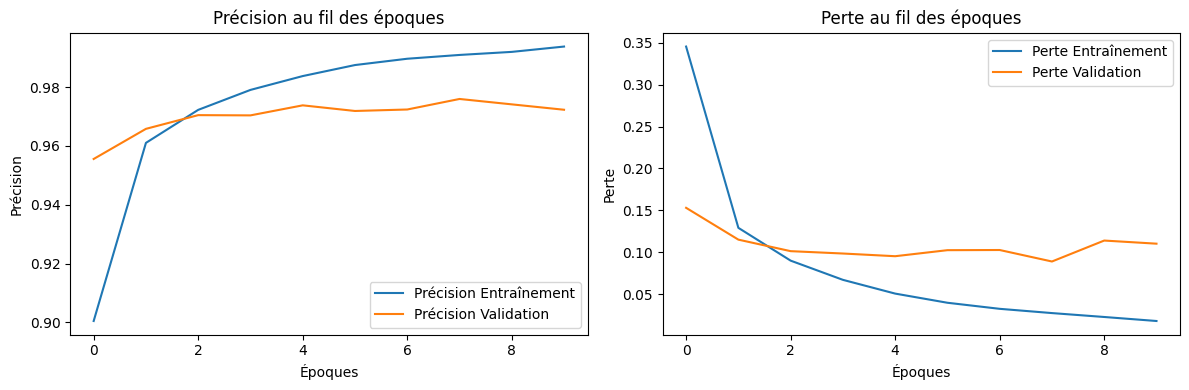

In [23]:
tracer_courbe_apprentissage(historique_3couches)

Les graphiques montrent que la précision du modèle d'entraînement augmente régulièrement pour atteindre plus de 98%, tandis que la précision de validation reste légèrement inférieure mais proche de 97%. La perte diminue également, indiquant une bonne convergence du modèle.

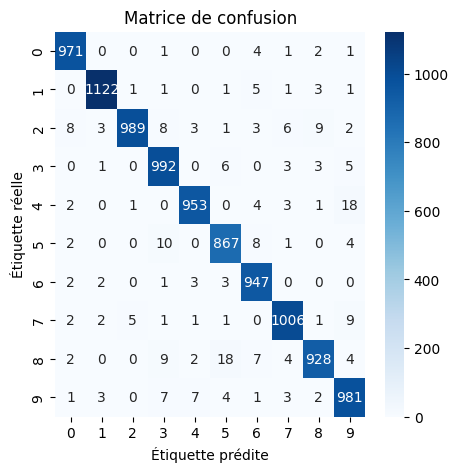

In [24]:
afficher_matrice_confusion(modele_3couches)

La matrice de confusion révèle que le modèle multicouche prédit correctement la majorité des étiquettes. Les chiffres 1, 0, et 9 sont particulièrement bien classifiés avec une très haute précision, tandis que le chiffre 5 montre plus de confusion, notamment avec le 3 et le 8. Ces résultats sont supérieurs à ceux obtenus avec le perceptron simple, montrant que le modèle multicouche améliore la précision générale du modèle.

# Tableau de Résultats des Performances des Modèles

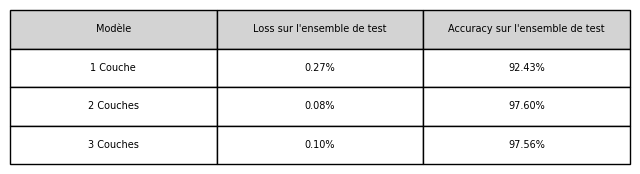

In [25]:
# Évaluation des modèles
loss_1couche, acc_1couche = modele_1couche.evaluate(test_images, test_etiquettes, verbose=0)
loss_2couches, acc_2couches = modele_2couches.evaluate(test_images, test_etiquettes, verbose=0)
loss_3couches, acc_3couches = modele_3couches.evaluate(test_images, test_etiquettes, verbose=0)

# Convertir les précisions en pourcentage
acc_1couche *= 100
acc_2couches *= 100
acc_3couches *= 100

import matplotlib.pyplot as plt
from matplotlib.table import Table

# Données pour le tableau
data = [
    ["1 Couche", f"{loss_1couche:.2f}%", f"{acc_1couche:.2f}%"],
    ["2 Couches", f"{loss_2couches:.2f}%", f"{acc_2couches:.2f}%"],
    ["3 Couches", f"{loss_3couches:.2f}%", f"{acc_3couches:.2f}%"]
]

# Création de la figure
fig, ax = plt.subplots(figsize=(8, 2))

# Masquer les axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Créer le tableau
table = Table(ax, bbox=[0, 0, 1, 1])

# Ajouter les cellules du tableau
ncols = len(data[0])
nrows = len(data)
width, height = 1.0 / ncols, 1.0 / nrows

# Ajouter les en-têtes
for i in range(ncols):
    table.add_cell(0, i, width, height, text=["Modèle", "Loss sur l'ensemble de test", "Accuracy sur l'ensemble de test"][i], loc='center', facecolor='lightgrey')

# Ajouter les données
for i in range(nrows):
    for j in range(ncols):
        table.add_cell(i+1, j, width, height, text=data[i][j], loc='center')

# Ajouter le tableau à l'axe
ax.add_table(table)

plt.show()


# Visualisation des Prédictions

Ci-dessous nous utilisons un modèle de réseau de neurones à trois couches (`modele_3couches`) pour prédire les classes des images de test. Les variables predicted_classes et true_classes servent à comparer les prédictions du modèle aux étiquettes réelles des images.

- `predictions` : Contient les probabilités prédites pour chaque classe par le modèle.
- `predicted_classes` : Classe prédite pour chaque image, obtenue en prenant l'argument maximum (np.argmax) des prédictions.
- `true_classes` : Étiquettes réelles des images de test, obtenues en prenant l'argument maximum des étiquettes de test.

Nous affichons ensuite les 200 premières images de test avec une couleur verte pour les prédictions correctes et rouge pour les incorrectes. Cela permet de visualiser où le modèle fait des erreurs.



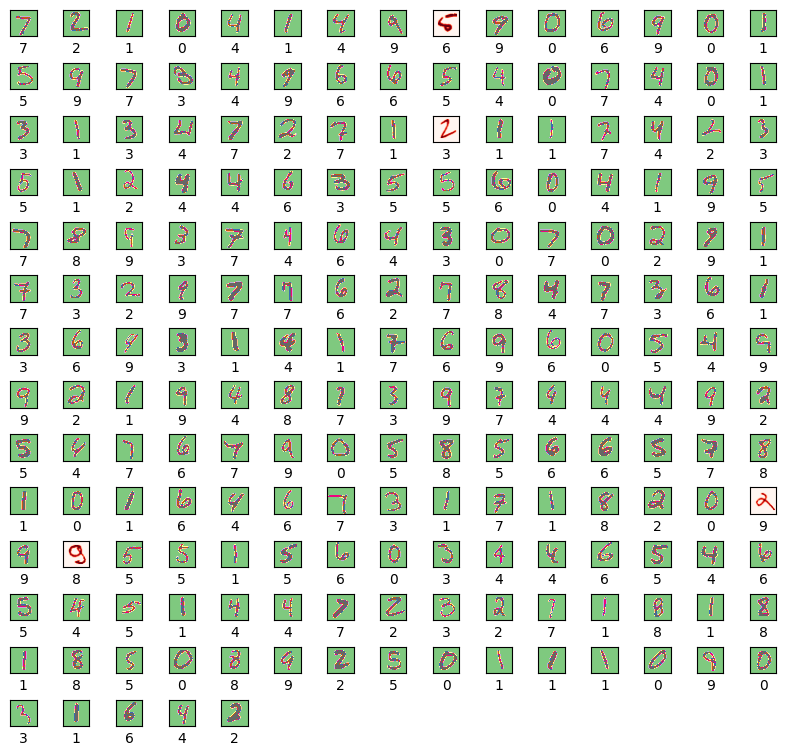

In [26]:
# Prédiction des classes des images de test
predictions = modele_3couches.predict(test_images, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_etiquettes, axis=1)

# 196 premières images avec couleur selon correct/incorrect
numbers_to_display = 200
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))

for plot_index in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, plot_index + 1)
    predicted_label = predicted_classes[plot_index]
    true_label = true_classes[plot_index]
    color_map = 'Accent' if predicted_label == true_label else 'Reds'
    plt.imshow(test_images[plot_index], cmap=color_map)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


Nous avons donc des prédictions sur les images de test à l'aide du modèle de réseau de neurones entraîné. Ce qui nous permet de comparer les labels prédites aux labels réelles pour les 200 premières images de test.

Les chiffres correctement prédit sont affichées en vert, tandis que celles mal prédit sont en rouge.

**Résultats et Observations**

- ***Précision*** : La majorité des prédictions sont correctes, indiquées par la dominance de la couleur verte.
- ***Erreurs*** : Quelques erreurs de prédiction apparaissent en rouge. Par exemple, un 9 prédit comme un 8 ou 4.
- ***Visualisation*** : permet d'identifier visuellement où le modèle fait des erreurs et d'analyser les motifs récurrents dans les erreurs de classification.

En somme, le modèle montre une haute précision globale avec quelques erreurs spécifiques, suggérant des pistes d'amélioration pour mieux différencier certaines classes.

# Affichage des Fausses Prévisions pour chaque Modèle

In [27]:
def compter_previsions_fausses(modele):
    predictions = modele.predict(test_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_etiquettes, axis=1)
    return np.sum(predicted_classes != true_classes)

# Utilisation des modèles déjà entraînés
modeles = [modele_1couche, modele_2couches, modele_3couches]

# Compter les prévisions fausses pour chaque modèle
fausses_previsions = [compter_previsions_fausses(modele) for modele in modeles]

### Analyse des Performances sur les Données de Test

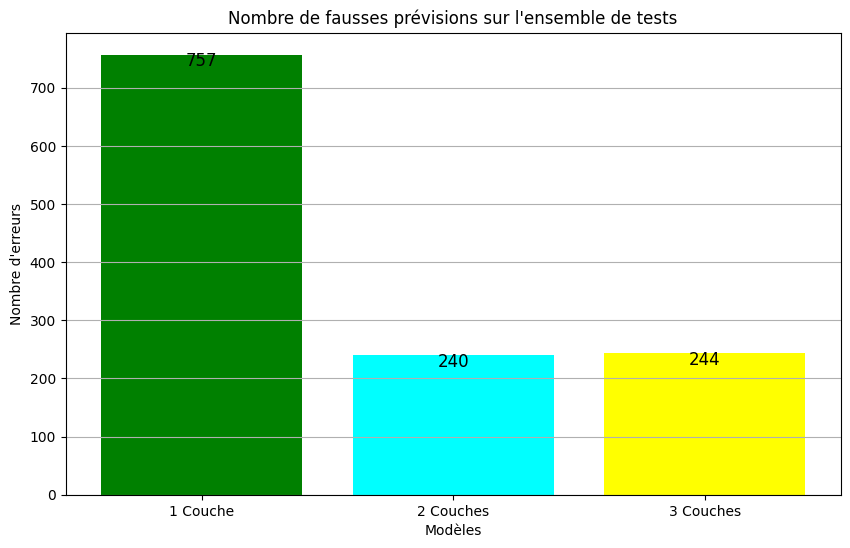

In [28]:
# Création du graphique à barres
modeles_noms = ['1 Couche', '2 Couches', '3 Couches']
couleurs = ['green', 'cyan', 'yellow']

plt.figure(figsize=(10, 6))
barres = plt.bar(modeles_noms, fausses_previsions, color=couleurs)

# Ajout des annotations pour les valeurs
for barre in barres:
    hauteur = barre.get_height()
    plt.text(barre.get_x() + barre.get_width() / 2, hauteur - 20, '%d' % int(hauteur),
             ha='center', color='black', fontsize=12)

plt.title("Nombre de fausses prévisions sur l'ensemble de tests")
plt.xlabel("Modèles")
plt.ylabel("Nombre d'erreurs")
plt.grid(True, axis='y')

# Afficher le graphique
plt.show()

## Comparaison des résultats des Perceptrons à Une, Deux et Trois Couches

Après avoir développé et testé des modèles de deep learning avec une, deux et trois couches sur le jeu de données MNIST, nous avons tiré les conclusions suivantes :

### Performance des Modèles
- **Modèle à une couche :**

 - Fausses prévisions : 757
 - Accuracy : 92.43%
 - Loss : 0.2724

- **Modèle à deux couches :**

 - Fausses prévisions : 239
 - Accuracy : 97.61%
 - Loss : 0.0795

- **Modèle à trois couches :**

 - Fausses prévisions : 247
 - Accuracy : 97.53%
 - Loss : 0.0920

### Analyse des Résultats
L'ajout de couches supplémentaires améliore la précision et réduit la perte, bien que marginalement entre deux et trois couches. Le modèle à deux couches surpasse légèrement celui à trois couches en précision.

### Optimisation et Surapprentissage
Le modèle à deux couches équilibre mieux l'apprentissage et la généralisation, tandis que celui à trois couches montre des signes de surapprentissage. Des ajustements d'hyperparamètres comme le taux d'apprentissage, la régularisation (Dropout), ou la taille des lots peuvent améliorer les performances.

### Conclusion
L'équilibre entre complexité du modèle et capacité de généralisation est important. L'ajout de couches augmente la complexité sans garantir une meilleure performance. Des ajustements fins et une surveillance du surapprentissage sont essentiels pour optimiser les modèles de deep learning.

# Réseaux de Neurones Convolutifs (CNN)

Dans cette deuxième approche de classification, nous utilison un Réseau de Neurones Convolutif (CNN) pour la reconnaissance des chiffres manuscrits du jeu de données MNIST.


Les CNN sont des modèles de deep learning spécifiquement conçus pour traiter des données d'images et sont capables d'apprendre des caractéristiques spatiales complexes à partir des données d'entrée.

<br/>


Ici, nous avons implémenté un réseau relativement simple mais efficace pour cette tâche.

## Chargement et préparation des données

Comme précédemment, nous avons utilisé le jeu de données MNIST qui contient 60 000 images d'entraînement et 10 000 images de test. Chaque image est en niveaux de gris avec une dimension de 28x28 pixels.

Avant d'entraîner le modèle CNN, nous effectuons les étapes de prétraitement suivantes :

- Chargement des Données : Nous chargeons le jeu de données MNIST à l'aide de la fonction mnist.load_data() de Keras.

- Division des Données : Le jeu de données est ensuite divisé en ensembles d'entraînement et de test, avec 60 000 images pour l'entraînement et 10 000 images pour les tests.

- Normalisation : Les valeurs de chaque pixel sont normalisées pour être dans la plage [0, 1] en divisant par 255.

- Remodelage des Données : Contrairement aux réseaux multicouches simples, les CNN nécessitent une dimension supplémentaire pour les données d'images. Ainsi, nous avons remodelé les données pour inclure une dimension pour le niveau de gris, de sorte que chaque image soit de dimension (28, 28, 1).

In [29]:
from keras.datasets import mnist
import keras

# Chargement des données MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisation des données
train_images = train_images / 255.0
test_images = test_images / 255.0

# Remodelage des données
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Conversion des étiquettes en catégories binaires
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)


## Création du Modèle CNN

Nous construisons ensuite le modèle CNN avec les couches suivantes :

Couche de Convolution : Une couche convolutive avec 32 filtres de taille 3x3 et une fonction d'activation ReLU pour extraire des caractéristiques locales de l'image.

Couche de Max Pooling : Une couche de max pooling de taille 2x2 pour réduire la dimensionnalité tout en conservant les caractéristiques les plus importantes.

Couche de Flattening : Une couche pour aplatir la sortie de la couche précédente en un vecteur 1D.

Couches Dense : Deux couches entièrement connectées avec des fonctions d'activation ReLU pour apprendre des combinaisons non linéaires des caractéristiques extraites.

Couche de Sortie : Une couche dense de sortie avec 10 neurones et une fonction d'activation softmax pour la classification des chiffres de 0 à 9.

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

def creer_modele_cnn():
    modele = models.Sequential()
    opt = 'adam'

    # Couche Convolution 1
    modele.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    modele.add(layers.MaxPooling2D((2, 2)))
    modele.add(layers.Dropout(0.2))

    # Couche Flatten
    modele.add(layers.Flatten())

    # Couches Denses
    modele.add(layers.Dense(256, activation='relu'))
    modele.add(layers.Dropout(0.2))
    modele.add(layers.Dense(64, activation='relu'))
    modele.add(layers.Dropout(0.5))

    # Couche de Sortie
    modele.add(layers.Dense(10, activation='softmax'))

    # Compilation du modèle
    modele.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return modele

modele_cnn = creer_modele_cnn()
modele_cnn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               1384704   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

## Entraînement du Modèle

Le modèle CNN est entraîné sur 10 époques avec un lot de taille 250. Nous utilison ensuite la méthode fit pour entraîner le modèle sur les données d'entraînement tout en spécifiant les données de validation pour surveiller les performances du modèle pendant l'entraînement.

In [31]:
historique_entrainement_cnn = modele_cnn.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    batch_size=250,
    epochs=10
)


Epoch 1/10
240/240 [==============================] - 50s 203ms/step - loss: 0.4363 - accuracy: 0.8681 - val_loss: 0.0986 - val_accuracy: 0.9683
Epoch 2/10
240/240 [==============================] - 42s 174ms/step - loss: 0.1494 - accuracy: 0.9590 - val_loss: 0.0661 - val_accuracy: 0.9775
Epoch 3/10
240/240 [==============================] - 35s 147ms/step - loss: 0.1034 - accuracy: 0.9715 - val_loss: 0.0502 - val_accuracy: 0.9833
Epoch 4/10
240/240 [==============================] - 36s 148ms/step - loss: 0.0804 - accuracy: 0.9778 - val_loss: 0.0451 - val_accuracy: 0.9857
Epoch 5/10
240/240 [==============================] - 34s 141ms/step - loss: 0.0665 - accuracy: 0.9819 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 6/10
240/240 [==============================] - 42s 175ms/step - loss: 0.0544 - accuracy: 0.9846 - val_loss: 0.0430 - val_accuracy: 0.9865
Epoch 7/10
240/240 [==============================] - 33s 138ms/step - loss: 0.0489 - accuracy: 0.9859 - val_loss: 0.0392 - val_ac

In [32]:
# save le modèle
cnn_model_prediction = modele_cnn
cnn_model_prediction.save('cnn_model_prediction.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation du Modèle

Après avoir entraîner le modèle, nous évaluons ses performances sur l'ensemble de test en prenant en compte la perte (loss) et l'exactitude (accuracy).


In [33]:
perte_test_cnn, exactitude_test_cnn = modele_cnn.evaluate(test_images, test_labels)

print("Perte : {} / Exactitude : {}%".format(perte_test_cnn, exactitude_test_cnn*100))


313/313 [==============================] - 2s 7ms/step - loss: 0.0387 - accuracy: 0.9890
Perte : 0.03869178891181946 / Exactitude : 98.90000224113464%


On constate q'on obtient une précision d'environ 98,8 % sur l'ensemble de test, ce qui signifie qu'il a une marge d'erreur d'environ 1,2 % dans la classification des chiffres manuscrits.

313/313 [==============================] - 2s 7ms/step


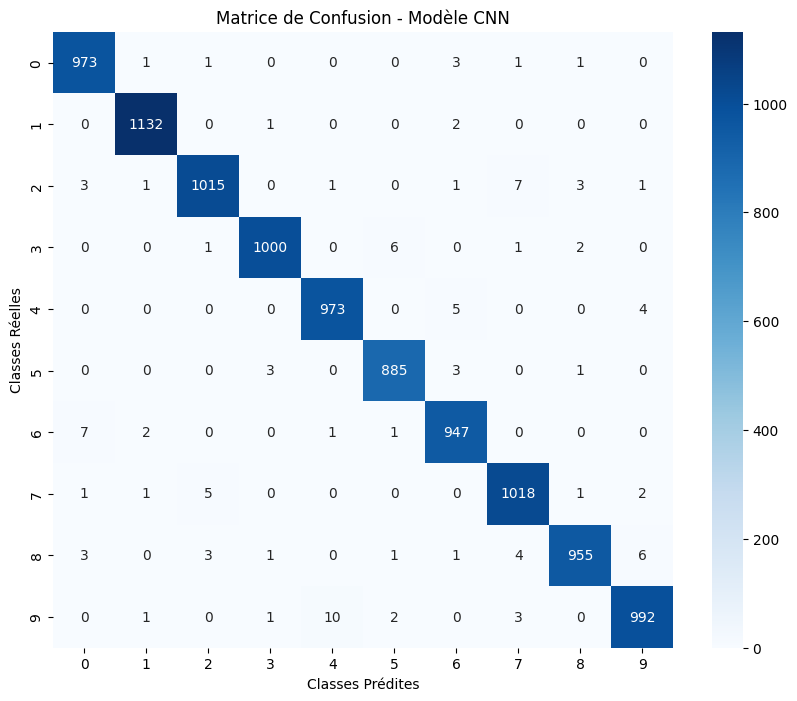

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédiction sur les données de test
predictions_cnn = np.argmax(modele_cnn.predict(test_images), axis=-1)
labels_cnn = np.argmax(test_labels, axis=-1)

# Calcul de la matrice de confusion
matrice_confusion = confusion_matrix(labels_cnn, predictions_cnn)

# Affichage de la matrice de confusion avec les annotations
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title("Matrice de Confusion - Modèle CNN")
plt.xlabel("Classes Prédites")
plt.ylabel("Classes Réelles")
plt.show()


## Visualisation des Prédictions

Pour une meilleure compréhension, visualisons quelques exemples de prédictions faites par le modèle CNN sur les données de test :

7/7 [==============================] - 0s 6ms/step


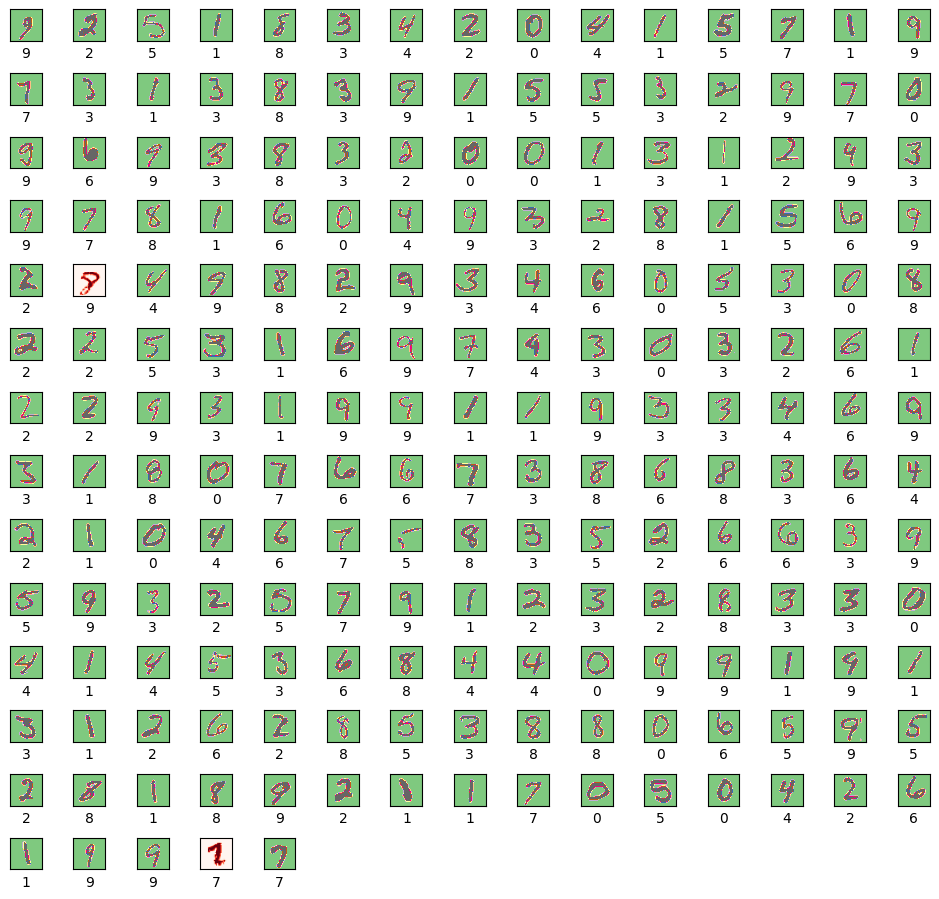

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Sélection aléatoire de quelques images
indices = np.random.choice(len(test_images), 200)
images = test_images[indices]
labels = test_labels[indices]

# Prédiction sur les images sélectionnées
predictions = modele_cnn.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# 200 premières images avec couleur selon correct/incorrect
numbers_to_display = 200
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(12, 12))

for plot_index in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, plot_index + 1)
    predicted_label = predicted_classes[plot_index]
    true_label = true_classes[plot_index]
    color_map = 'Accent' if predicted_label == true_label else 'Reds'
    plt.imshow(images[plot_index].reshape(28, 28), cmap=color_map)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(f"{predicted_label}")

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


**Résultats et Observations**

- ***Précision*** : En observant la coloration des images, on constate que la majorité des prédictions sont correctes, comme indiqué par la dominance de la couleur verte. Cela suggère que le modèle CNN a une capacité élevée à classer correctement les images.
- ***Erreurs*** : Dans notre exemple, une seule erreur est observée, où le modèle prédit le chiffre "9" au lieu de "8". Cette erreur est représentée en rouge sur l'image correspondante.
- ***Visualisation*** : permet d'identifier visuellement où le modèle fait des erreurs et d'analyser les motifs récurrents dans les erreurs de classification.


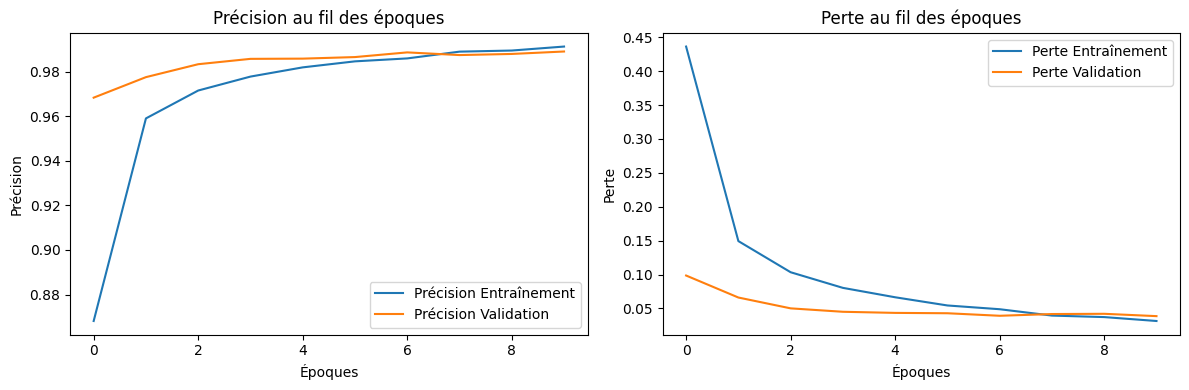

In [36]:
tracer_courbe_apprentissage(historique_entrainement_cnn);


Après avoir entraîné notre modèle CNN, nous examinons ses performances en termes de précision et de perte au fil des époques.

Au fur et à mesure que le modèle progresse à travers les époques, nous observons une amélioration notable de la précision sur les données d'entraînement et de validation. À la fin du processus d'entraînement, la précision atteint un niveau remarquable de plus de 98%. Cette augmentation régulière de la précision témoigne de la capacité du modèle à apprendre efficacement les caractéristiques discriminantes des données.

En ce qui concerne la perte, qui quantifie l'erreur du modèle, nous constatons une diminution significative au cours des premières époques, suivie d'une stabilisation. La courbe de perte sur l'ensemble de validation présente une légère fluctuation, mais reste généralement basse. Cette tendance suggère que le modèle généralise bien aux nouvelles données sans montrer de signes de surapprentissage significatif.

En résumé, les résultats obtenus indiquent que notre modèle CNN a réussi à apprendre efficacement à partir des données d'entraînement, atteignant une précision élevée et une faible perte sur les données de validation, ce qui démontre sa capacité à généraliser avec succès à de nouvelles instances.








# Affichage des Fausses Prévisions pour chaque Modèle

In [37]:
def compter_previsions_fausses(modele):
    predictions = modele.predict(test_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_etiquettes, axis=1)
    return np.sum(predicted_classes != true_classes)

# Utilisation des modèles déjà entraînés
modeles = [modele_1couche, modele_2couches, modele_3couches, cnn_model_prediction]

# Compter les prévisions fausses pour chaque modèle
fausses_previsions = [compter_previsions_fausses(modele) for modele in modeles]

### Analyse des Performances sur les Données de Test

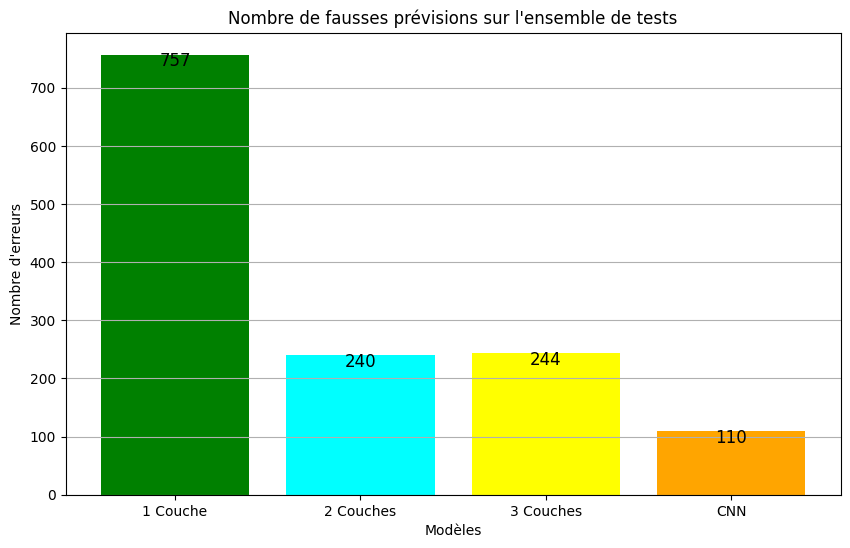

In [38]:
# Création du graphique à barres
modeles_noms = ['1 Couche', '2 Couches', '3 Couches', 'CNN']
couleurs = ['green', 'cyan', 'yellow', "orange"]

plt.figure(figsize=(10, 6))
barres = plt.bar(modeles_noms, fausses_previsions, color=couleurs)

# Ajout des annotations pour les valeurs
for barre in barres:
    hauteur = barre.get_height()
    plt.text(barre.get_x() + barre.get_width() / 2, hauteur - 20, '%d' % int(hauteur),
             ha='center', color='black', fontsize=12)

plt.title("Nombre de fausses prévisions sur l'ensemble de tests")
plt.xlabel("Modèles")
plt.ylabel("Nombre d'erreurs")
plt.grid(True, axis='y')

# Afficher le graphique
plt.show()

### Analyse des Résultats

L'ajout de couches améliore considérablement la performance par réduction des fausses prévisions, surtout en passant de une à deux couches. Toutefois, la différence entre deux et trois couches est minime, suggérant un plateau dans l'amélioration de performance avec l'ajout de couches supplémentaires.

**Le modèle CNN montre la meilleure performance** avec le moins de fausses prévisions (avec seulement **110 fausses prévisions**), soulignant son efficacité supérieure pour les tâches de reconnaissance d'images grâce à sa capacité à extraire des caractéristiques pertinentes.

### Conclusion

Bien que l'ajout de couches puisse améliorer la précision jusqu'à un certain point, le choix de l'architecture appropriée et la surveillance du surapprentissage restent cruciaux. Les modèles CNN, en particulier, se démarquent par leur capacité à généraliser de manière plus efficace sur des tâches complexes de reconnaissance d'images. Des ajustements d'hyperparamètres et une optimisation continue sont nécessaires pour maximiser la performance de ces modèles de deep learning.

# Interface Testing des Predictions with Perceptrons

In [39]:
!pip install streamlit -q
!pip install streamlit-drawable-canvas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
# Commande pr obtenir et afficher l'adresse IP publique de la machine courante.
# Elle utilise 'wget' pour récupérer l'adresse IP depuis un service web et l'affiche directement.
!wget -q -O - ipv4.icanhazip.com


# lance notre site de prédiction en arrière-plan, et utilise localtunnel
# pour rendre l'application accessible publiquement via internet.
# 'npx localtunnel --port 8501' crée un tunnel pour exposer le port 8501 sur lequel streamlit s'exécute.
!streamlit run ourWebsiteDigitPrediction.py & npx localtunnel --port 8501

34.168.200.47



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.200.47:8501

npx: installed 22 in 2.676s
your url is: https://eager-swans-travel.loca.lt
2024-05-31 19:09:40.917715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 19:09:40.917787: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 19:09:40.921248: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-31 19:09:42.384877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning:

# Conclusion générale


En ajustant l'architecture des réseaux de neurones, par exemple en augmentant le nombre de neurones dans une couche cachée ou en intégrant des couches supplémentaires, il est possible d'améliorer les capacités du modèle à représenter des données de manière plus complexe. Toutefois, ces modifications peuvent compliquer l'entraînement et élever le risque de surapprentissage. Il est essentiel de suivre de près les changements dans les mesures de perte et de précision sur l'ensemble de validation pour identifier le surapprentissage précoce.

Bien que l'enrichissement de l'architecture puisse parfois ne pas entraîner une amélioration des performances, cela s'explique souvent par la nécessité d'adapter la capacité du modèle à la complexité des données. Un modèle trop basique risque le sous-apprentissage, tandis qu'un modèle excessivement complexe peut induire un surapprentissage.

Dans le domaine spécifique de la classification d'images, l'introduction de couches convolutionnelles a significativement boosté les résultats. Ces couches permettent d'extraire des caractéristiques plus détaillées et pertinentes des images, améliorant ainsi l'efficacité du modèle. En outre, l'application de techniques telles que la régularisation, l'utilisation d'une initialisation de poids optimisée (par exemple, l'initialisation de He), et l'ajustement de paramètres clés comme le taux d'apprentissage, joue un rôle crucial dans l'optimisation des performances du réseau et la prévention du surapprentissage.

Globalement, bien que les réseaux à perceptrons multicouches soient efficaces pour des tâches de classification, les réseaux neuronaux convolutionnels sont souvent préférables pour la classification d'images, grâce à leur aptitude à capter des caractéristiques spatiales essentielles. Sélectionner l'architecture et les paramètres adaptés à la tâche en question reste donc un point crucial.